### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Loading the dataset

In [2]:
columns=['Id','Refractive_Index','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']

In [3]:
df=pd.read_csv('glass.data',names=columns)
df.set_index('Id',inplace=True)

In [4]:
df.head()

,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### have an overview of the dataset

In [5]:
df.columns

Index(['Refractive_Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')

In [6]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            205, 206, 207, 208, 209, 210, 211, 212, 213, 214],
           dtype='int64', name='Id', length=214)

In [7]:
df.dtypes

Refractive_Index    float64
Na                  float64
Mg                  float64
Al                  float64
Si                  float64
K                   float64
Ca                  float64
Ba                  float64
Fe                  float64
Type_of_glass         int64
dtype: object

<AxesSubplot:xlabel='Type_of_glass', ylabel='count'>

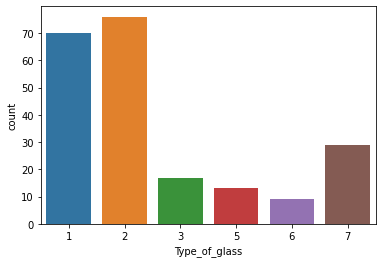

In [8]:
sns.countplot(x=df.Type_of_glass)

In [9]:
### we see the data is biased

In [10]:
df.Refractive_Index.value_counts()

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: Refractive_Index, Length: 178, dtype: int64

### Cleaning the dataset

In [11]:
df.isnull().sum()

Refractive_Index    0
Na                  0
Mg                  0
Al                  0
Si                  0
K                   0
Ca                  0
Ba                  0
Fe                  0
Type_of_glass       0
dtype: int64

In [12]:
len(df)

214

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
len(df)

213

In [15]:
df.columns

Index(['Refractive_Index', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')

In [16]:
def plot():
    cols={1:'Refractive_Index',2:'Na',3:"Mg",4:"Al",5:'Si',6:"K",7:"Ca",8:"Ba",9:"Fe"}

    t=int(input('Enter the column number that you want to see the realtion of'))
    x=df[cols[t]]
    plt.figure(figsize=(15,10))
    plt.scatter(x=x,y=df.Type_of_glass)
    plt.title(cols[t])
    



Enter the column number that you want to see the realtion of1


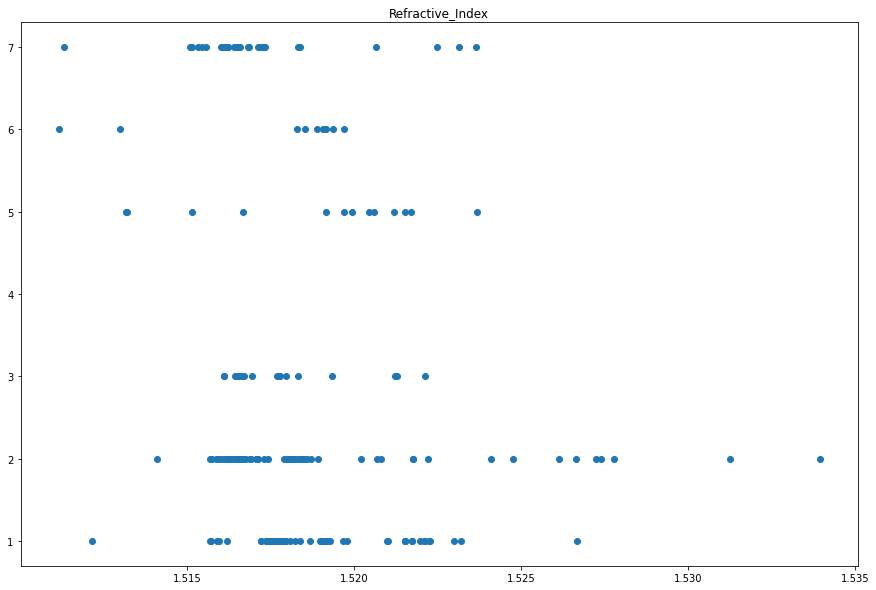

In [56]:
plot()

Text(0.5, 1.0, 'Detecting outliers using Boxplot')

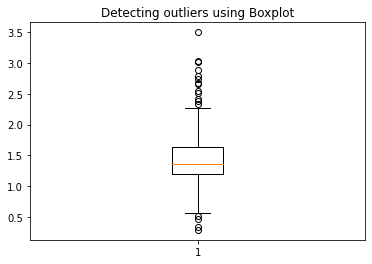

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(df.Al)
plt.title("Detecting outliers using Boxplot")

In [19]:
len(df)

213

In [20]:
df.groupby('Type_of_glass').count()

,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type_of_glass,,,,,,,,,
1,69,69,69,69,69,69,69,69,69
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


### Outlier detection

In [21]:
len(df)

213

In [22]:
len(df[((df.Refractive_Index)>1.5) & ((df.Refractive_Index)<1.6)])

213

In [23]:
### Means all the RI values are in the proper range for glass

In [24]:
X=df.drop(['Type_of_glass'],axis='columns')

X

,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe
Id,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0


In [25]:
y=df.Type_of_glass

In [26]:
scores={}

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [28]:
x_train

,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe
Id,,,,,,,,,
143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25
124,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00
204,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
...,...,...,...,...,...,...,...,...,...
84,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09
56,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24
37,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00


In [29]:
x_test

,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe
Id,,,,,,,,,
88,1.51645,13.40,3.49,1.52,72.65,0.67,8.08,0.00,0.10
38,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.00
187,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00
161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
79,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14
41,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.00
131,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.00,0.00
169,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00
53,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00


In [30]:
df2=df.copy()
df2.head()

,Refractive_Index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
def remove(df): ## this is used to remove outliers
    output=pd.DataFrame()
    for key,sliced in df.groupby('Type_of_glass'):
        mean=np.mean(sliced.Refractive_Index)
        std=np.std(sliced.Refractive_Index)
        reduced_df= sliced[(sliced.Refractive_Index > (mean-std)) & (sliced.Refractive_Index<=(mean+std) )] ## This line will have only those
        # rows that have their refractive_index in the 1st standar deviation
        output=pd.concat([output,reduced_df],ignore_index=True)
        
    return output

In [32]:
df2=remove(df2)

In [33]:
X2=df2.drop(['Type_of_glass'],axis='columns')
y2=df2['Type_of_glass']

In [34]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

In [35]:

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [36]:

GNB1=GaussianNB()
MNB1=MultinomialNB()
BNB1=BernoulliNB()
KNN1=KNeighborsClassifier()
DT1=DecisionTreeClassifier()
SVM1=SVC()
RF1=RandomForestClassifier()

list_models=[GNB1,MNB1,BNB1,KNN1,DT1,SVM1,RF1]

In [37]:
def fitted(model,x_train,y_train):
    
    return model.fit(x_train,y_train)

In [38]:
for i in range(0,len(list_models)):
    list_models[i]=fitted(list_models[i],x_train,y_train)

In [39]:

GNB2=GaussianNB()
MNB2=MultinomialNB()
BNB2=BernoulliNB()
KNN2=KNeighborsClassifier()
DT2=DecisionTreeClassifier()
SVM2=SVC()
RF2=RandomForestClassifier()

list_models2=[GNB2,MNB2,BNB2,KNN2,DT2,SVM2,RF2]

In [40]:
for i in range(0,len(list_models2)):
    list_models2[i]=fitted(list_models[i],x_train,y_train)

In [41]:
scores1={} ### one is without removing outliers
scores2={}

In [42]:
def scores_cal(model):
    from sklearn.model_selection import cross_val_score, ShuffleSplit

    cv= ShuffleSplit(n_splits=5,test_size=0.2, random_state=0) ## it is used to split data 
    t=cross_val_score(model,X,y,cv=cv)
    return np.average(t)

In [43]:
for m in list_models:
    scores1[str(m)]=scores_cal(m)

In [44]:
for m in list_models2:
    scores2[str(m)]=scores_cal(m)

In [45]:
scores1

{'GaussianNB()': 0.41860465116279066,
 'MultinomialNB()': 0.48372093023255813,
 'BernoulliNB()': 0.4046511627906977,
 'KNeighborsClassifier()': 0.6186046511627907,
 'DecisionTreeClassifier()': 0.6883720930232559,
 'SVC()': 0.3069767441860465,
 'RandomForestClassifier()': 0.7813953488372094}

In [46]:
scores2

{'GaussianNB()': 0.41860465116279066,
 'MultinomialNB()': 0.48372093023255813,
 'BernoulliNB()': 0.4046511627906977,
 'KNeighborsClassifier()': 0.6186046511627907,
 'DecisionTreeClassifier()': 0.6511627906976745,
 'SVC()': 0.3069767441860465,
 'RandomForestClassifier()': 0.7534883720930232}

In [47]:
### We conclude the accuracy is best with random forest classifier

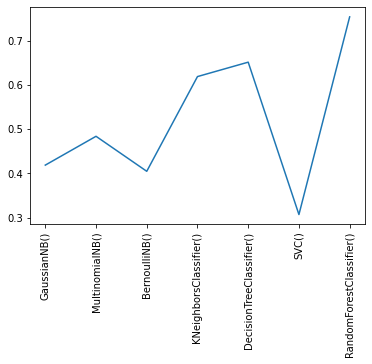

In [57]:
x = list(scores1.keys())
values = list(scores2.values())

plt.plot(x, values)
plt.xticks(rotation=90)
plt.show()
